# Assignment 1: Data Collection & Preparation 


### Name: Julie McGarrigle
### Student Name: 15357556


Before gathering the information, we have to import the relevant modules in order to access functions. Importing Pandas offers two data structures - Data frame and Series - to help in structuring the data in a clear and concise manner. 
matplotlib is a 2D plotting library that allows us to produce histograms, bar charts etc.
Importing the function json_normalize from the module pandas.io.json library allows us to normalize a nested json file.
We can also see we import the numpy module with a short name, np. This allows you to deal with large arrays and matrices.

There are also two functions included - get_data and write_to_file. The function get_data extracts data using requests.get which allows you to send a HTTP request. Printing out the response, it returns the number 200 if the request succeeded and that the resource is returned. Otherwise, it prints an error message.
    The write_to_file function writes the data gathered into a file.

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

# function to retrieve the data 
def get_data(link):
    response = requests.get(link)
    print(response.status_code)
    return response.text
    if response.status_code != 200:
    # This means something went wrong.
        print("Something went wrong")
        
# function to write the data to a file
def write_to_file(file_loc, data):
    with open(file_loc, 'w') as outfile:  
        json.dump(data, outfile)   

# API Chosen: City Bikes

I have chosen to focus my assignment on City Bikes. These are available bikes distributed through cities to enable easy access and optimal use. I have decided to use the data from the smart bikes to analyse how the usage of the bikes changes according to the hour of the day and the weather in the city.

The single API that was chosen for this assignment was provided by www.jcdecaux.com
The information on the API was specifically obtained from: https://developer.jcdecaux.com/#/opendata/vls?page=getstarted

The API key that works here is: 9dedcdaa55f1ed6ab52bf056c755610e9a5c6242

### Step 1: Collecting data

First thing to do is to gather the data using the function get_data

Only one call of the API is needed at one time since all the information is provided in real-time and all the information is provided on one call.

In [2]:
api_key = "9dedcdaa55f1ed6ab52bf056c755610e9a5c6242"
link = "https://api.jcdecaux.com/vls/v1/stations?apiKey="+api_key
response = get_data(link)

200


As we can see, the response is 200 which indicates a successful request and we can proceed with the preparation of the data.

Next, in order to be able to manipulate the data and convert the data into tables, we must parse the data. This converts a given string into a dictionary which allows you to access your JSON data easily within your code.

In [3]:
DataCollected = json.loads(response)

### Step 2: Save the information to a json file 

Using the dump() method from the json library, we can write data to files. We can created a json file and using json.dump(), the data called DataCollected can be written to the file. This is done within the function write_to_file

In [4]:
filename = '.json'   #insert name of file
write_to_file(filename, DataCollected)

### Step 3: Open a file that has information stored in it already 

If we want to load data that we have saved in a file into the notebook, we use the following commands:

In [5]:
with open(filename, 'r') as file:
    Data = json.load(file)

### Step 4: Producing the data as a dataframe 

In order to be able to analyse the data and view it in a clear and concise manner, we can convert the data into a dataframe. Firstly, we have to normalize the data into a flat table using json_normalize(). We then call on pd.DataFrame() which creates a 2 dimensional data structure with labeled axes.

In [6]:
Data = json_normalize(Data)
Data2=pd.DataFrame(Data)

Next, i am going to present some examples of how i analysed the data to see trends/patterns

## Example 1: City Bikes - 01/03/2019 at 20:56 pm 

The first example is information taken from the city bikes on the Friday 1st March 2019 at 20:56 pm. This example focuses on filtering the dataframe to display only the information of interest. 
I analyse all the cities that have these bikes installed and identify the city that has the most bike stands/the least bike stands etc.

I then filter the information to only contain information concerning Dublin. I analyse the areas of Dublin that have the most bike stands installed and how many bikes are available at this time in certain places.

### Example 1 Part 1: Analyse all the data

Firstly, i have to import the information from a file saved on my computer. Since the information i gather is real-time data, i save the files to my computer as json files to be able to use them at any stage. Therefore, the code below imports the data from the file, in this case, the file is called 'BikeData010320192056'. The numbers in the file name relate to when the data was collected.

In [7]:
with open('BikeData010320192056.json', 'r') as file1:
    Data01032019 = json.load(file1)

As stated previously, the data is normalized into a flat table and then produced as a dataframe.

In [8]:
DataCollected01032019 = json_normalize(Data01032019)
DataFrame01032019=pd.DataFrame(DataCollected01032019)

From the data frame, i can see that i am only interested in the following columns: address, available_bike_stands, available_bikes, bike_stands and contract_name. Therefore, i am going to remove the other columns present.

In [12]:
CleanDataFrame01032019=DataFrame01032019.drop(DataFrame01032019.columns[[3,5,7,8,9,10,11,12]], axis=1)

We check that there is no missing data

In [10]:
CleanDataFrame01032019.isnull().sum() # no missing values in the reduced dataset 

address                  0
available_bike_stands    0
available_bikes          0
bike_stands              0
contract_name            0
dtype: int64

#### Description Of Information Provided in DataFrame

address = street of the bike stand

bike_stands = the number of operational bike stands at this station

available_bike_stands = the number of available bike stands at this station 

available_bikes = the number of available and operational bikes at this station

contract_name = city

Grouping the data according to the contract name and finding the amount of times each contract name is mentioned allows us to capture how many bike stations there are in the different countries. Example: Brisbane has 151 bike stations altogether.
We can see that Brussels has the most amount of bike stations, having a total of 349. Kazan and Lillestrom have the least amount of bike stations, having a total of only 6. Considering the population of Lillestrom is 14,000, we would expect this low number of stations. However, the population of Kazan is 1.169 million, yet there are only 6 bike stations. Comparing Kazan to Brussels which have similar populations, there is a major difference between the amount of bike stations in the cities. This could be due to the typical weather of the cities. Kazan would experience snow and cold temperatures (-7 degrees to -15 degrees) from November until March, making it very hard to be able to cycle around the city. While Brussels would experience slightly milder temperatures (2 degrees to 7 degrees). Alternatively, Brussels could be more suitable to cycling in terms of cycling tracks etc compared to Kazan.


In [13]:
TotalNumberOfStations01032019 = CleanDataFrame01032019['contract_name'].value_counts()
TotalNumberOfStations01032019 = pd.DataFrame(TotalNumberOfStations01032019)

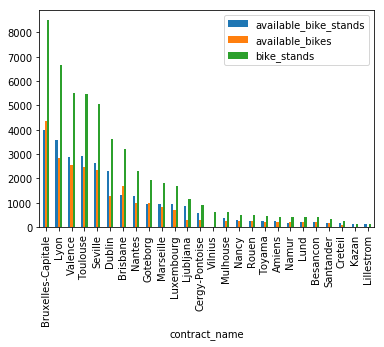

In [14]:
TotalBikesInformationDataFrame01032019=CleanDataFrame01032019.groupby('contract_name')
TotalBikesDataFrame01032019=TotalBikesInformationDataFrame01032019.sum()
TotalBikesDataFrame01032019=TotalBikesDataFrame01032019.sort_values('bike_stands', ascending = False)
my_plot = TotalBikesDataFrame01032019.plot(kind='bar')

Plotting the total number of bike stands, available bikes and available bike stands according to the contract name gives us a better view of places where the bike scheme is popular. Then again, we get an even clearer view when we plot them in descending order of number of bike stands. Since Brussels has the most amount of bike stations, we expect it to have the highest number of bike stands. Since this is true, we see Brussels plotted on the left of the graph. We see Lillestrom and Kazan plotted on the right of the graph with the least amount of bike stands. Out of the 26 cities shown in the graph, Dublin comes 6th place with the number of bike stands equalling approximately 3500. To see the exact number of bike stands in Dublin, see the code below. 

Calculating the exact number of bike stands in Dublin City 

In [15]:
DublinInformation=CleanDataFrame01032019[CleanDataFrame01032019["contract_name"] == 'Dublin']
TotalNumberOfBikeStandsInDublin= DublinInformation['bike_stands'].sum()

If we look at Vilnius, we can see that there are a small amount of bike stations. However, there are no available bikes or bike stands at these stations. This would make us think that these stations are not in use. If we filter the data to display information on Vilnius only and see the status code, we can see if the bike system is still in use in the city. 

In [16]:
VilniusStationsDataFrame01032019 = DataFrame01032019[DataFrame01032019["contract_name"] == 'Vilnius']

All the bike stations for Vilnius show a status of 'CLOSED' implying that none of the bike stations are in use. This presents the idea that not all bike stands are in use for another cities too. Therefore, before we begin analysing how the data changes at different times of the day, we need to remove the data of bike stations that are not in use anymore aka remove bike stations with a status of 'CLOSED'. We can see this below in the code. 

In [17]:
OperatingStationsDataFrame01032019 = DataFrame01032019[DataFrame01032019["status"] == 'OPEN']
OperatingStationsDataFrame01032019=OperatingStationsDataFrame01032019.drop(OperatingStationsDataFrame01032019.columns[[3,5,7,8,9,10,11,12]], axis=1)

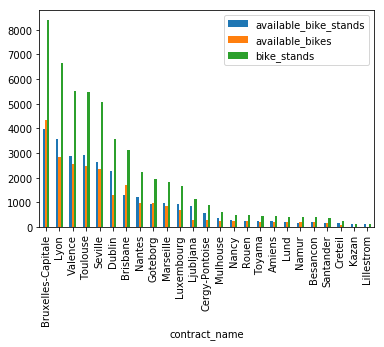

In [18]:
TotalBikesInformationOperatingStationsDataFrame01032019=OperatingStationsDataFrame01032019.groupby('contract_name')
TotalBikesOperatingStationsDataFrame01032019=TotalBikesInformationOperatingStationsDataFrame01032019.sum()
TotalBikesOperatingStationsDataFrame01032019=TotalBikesOperatingStationsDataFrame01032019.sort_values('bike_stands', ascending = False)
my_plot = TotalBikesOperatingStationsDataFrame01032019.plot(kind='bar')

In [19]:
OperatingStationsDataFrame01032019.describe()

,available_bike_stands,available_bikes,bike_stands
count,2498.000000,2498.000000,2498.000000
mean,11.056045,9.469576,20.845877
std,7.682740,6.863046,6.716636
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,16.000000
50%,10.000000,9.000000,20.000000
75%,15.000000,14.000000,24.000000
max,49.000000,44.000000,69.000000


Using describe() provides a detailed summary of the information in the dataframe. 

We can see that count is 2498 for all columns. This is another way of checking that there are no missing fields. Since the count is the same for all variables, there are no missing fields.

The mean and standard deviation are also provided. We can see that the average number of available bike stands is approx 11, the average number of available bikes is approx 9 and the average number of bike stands is approx 20. 
The standard deviation tells us how much the data is spread above or below the mean. In this case, the standard deviation is below the mean in all cases, meaning the data is close to the average.

The minimum number of available bike stands, the minimum number of available bikes and the minimum number of bike stands are all is 0.

The maximum number of available bike stands is 49.
The maximum number of available bikes is 44
The maximum number of bike stands is 69.

Next, i decided to examine the correlation between different columns in dataframe. I first focused on the correlation between the number of operational bike stands at a station (bike_stands) and the number of operational bikes at the station (available_bikes). I would have presumed the correlation would be high in this case since if the number of bike stands was high at a particular station, you would expect a higher chance of an available bike being there. To perform the correlation, we can use corr() which produces a table of the correlations of each of the factors.

In [20]:
BikeStandsVSAvailableBikeStands01032019 = OperatingStationsDataFrame01032019[['bike_stands', 'available_bikes']]
BikeStandsVSAvailableBikeStands01032019.shape
BikeStandsVSAvailableBikeStands01032019.corr()

,bike_stands,available_bikes
bike_stands,1.000000,0.355358
available_bikes,0.355358,1.000000


As we can see from the table, the correlation between the number of bike stands and the number of available bikes at the station have a low correlation, which is not what was expected. This means that as the number of bike stands increases, the number of available bikes only increases slightly. In hingsight, it does make sense that there would be a low correlation between these two factors since there will be a large number of bikes placed at a station that is in high demand. Therefore, more people will use the available bikes at this station.
We can get a clearer idea of the correlation by plotting the two factors in a scatter plot as seen below. When plotting, i decided to only consider the first 200 since the shape of the matrix of bike stands and available bikes is (2547, 2). Plotting 2547 bits of information on the scatter plot looked overcrowded. In the plot, it is obvious that there is no clear correlation between the two factors as the plot shows no definite linearity. However, we can see that it has a slight positive correlation as expected from our calculation. Also, we can notice an obvious outliner where (Number of Bike Stands, Number of Available Bikes)=(50, ~42).

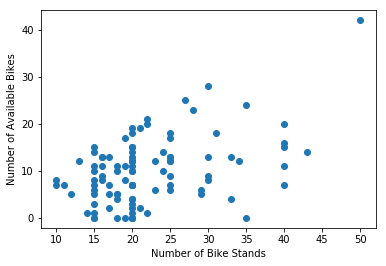

In [21]:
X= OperatingStationsDataFrame01032019['bike_stands'].head(100)
Y= OperatingStationsDataFrame01032019['available_bikes'].head(100)
plot = matplotlib.pyplot.scatter(X, Y)
plt.xlabel("Number of Bike Stands")
plt.ylabel("Number of Available Bikes")
plt.show()

We can perform the correlation again but for two different factors this time - Number of Available Bikes versus Number of Available Bike Stands. We would expect a negative correlation in this case since if the number of available bikes is low at a station, it is obvious that the number of available bike stands would be high.
In order to see better results, we can limit the values that we are interested in. If we focus the data on the number of the bike stands between 20 and 30, we can see a clear negative correlation.

In [22]:
LimitedDataFrame01032019 = OperatingStationsDataFrame01032019[(OperatingStationsDataFrame01032019['bike_stands'] >= 20) & (OperatingStationsDataFrame01032019['bike_stands'] <= 30)]
AvailableBikesVSAvailableBikeStands01032019 = LimitedDataFrame01032019[['available_bike_stands', 'available_bikes']]
AvailableBikesVSAvailableBikeStands01032019.shape
AvailableBikesVSAvailableBikeStands01032019.corr()

,available_bike_stands,available_bikes
available_bike_stands,1.000000,-0.875094
available_bikes,-0.875094,1.000000


As predicted, we can see that the correlation between available bikes and available bike stands is negatively correlated with a value of approximately -0.875. The plot below illustrates that again - there is a clear decrease in the number of available bikes as the number of available bike stands increases.

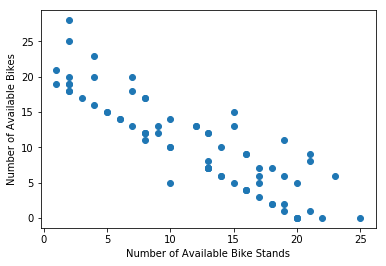

In [66]:
#--------------------Plot------------------------------------
X= LimitedDataFrame01032019['available_bike_stands'].head(75)
Y= LimitedDataFrame01032019['available_bikes'].head(75)
plot = matplotlib.pyplot.scatter(X, Y)
plt.xlabel("Number of Available Bike Stands")
plt.ylabel("Number of Available Bikes")
plt.show()

### Example 1 Part 2: Analysing the data concering Dublin

Next, I gather all the bike data and filter it to only produce the data about Dublin. I then sort the data in terms of the number of bike stands at each station in ascending order. This gives an idea of where the most amount of bike stands are. My presumption is that tourists and working people use the bikes the most. Therefore, i would expect to see the highest amount of bike stands around IFSC and grand canal dock but also in places that are a bit further out from the city centre that are tourist attractions eg. Kilmainham Gaol. This gives tourists the ability to cycle to these tourist attractions from/to the centre of the city with ease. It also gives people the opportunity to use the bikes as part of their commute.

In [24]:
DublinDataFrame01032019 = OperatingStationsDataFrame01032019[OperatingStationsDataFrame01032019['contract_name'] == 'Dublin']
DublinDataFrame01032019 = DublinDataFrame01032019.sort_values('bike_stands', ascending = False)

We can see from the dataframe that the maximum number of bike stands that can be at any station is 40 while the minimum is 16.
As predicted, some of the places that have the maximum number of the bike stands such as Kilmainham Gaol, The Point, Heuston Station are a bit further out from the city of the centre. Thus, having the bike stands in these positions allows people to access the centre of the city easily on the bikes. 
The two places with the least amount of bikes (bikes stands = 16) are Hardwicke Street and Dame Street. Dame Street is very central in Dublin and therefore, people would be more inclined to walk around the area. It can also be very busy with buses, cars and luas. Thus, there is less room for bike stands.
Because Hardwicke Street is further out of the centre and there are not as many tourist sites etc in that direction, we can presume there is less demand.

In [26]:
DublinDataFrame01032019.describe()

,available_bike_stands,available_bikes,bike_stands
count,112.000000,112.000000,112.000000
mean,20.339286,11.464286,31.991071
std,11.805903,9.842845,7.561752
min,0.000000,0.000000,16.000000
25%,13.000000,3.000000,29.000000
50%,20.000000,10.000000,30.000000
75%,29.000000,18.000000,40.000000
max,40.000000,40.000000,40.000000


Using the describe() function, we can gather the general information regarding the bike scheme in Dublin such as average available bike stands etc.

On average, there is around 11 bikes available at a stand. 

On average, there are 20 bike stands free.

The maximum number of available bike stands and available bikes is 40

It is interesting to examine the stations that have the most bike stands and analyse their usage. Above we saw that the maximum number of bike stands at a station is 40. Therefore, if we filter the information to display only the stations that have 40 bike stands and analyse the usage from there. 

In [27]:
LimitedDublinDataFrame01032019 = DublinDataFrame01032019[(DublinDataFrame01032019['bike_stands'] == 40)]

Considering the time of day this information was collected at - 20:56 pm on a Friday evening - we dont expect that many of the bikes would be used at this time. Therefore, we would expect that the number of available bikes would be around the same value as the number of bike stands. However, from analysing the data below, this is not the result we get. The average number of available bikes is approx 14 while the average number of bike stands is approx 32.

,available_bikes,bike_stands,available_bike_stands
count,20.000000,20.000000,20.000000
mean,14.350000,32.250000,17.900000
std,11.127373,6.927254,12.396519
min,0.000000,20.000000,0.000000
25%,3.500000,30.000000,7.500000
50%,13.000000,30.000000,18.500000
75%,25.750000,40.000000,26.500000
max,30.000000,40.000000,40.000000


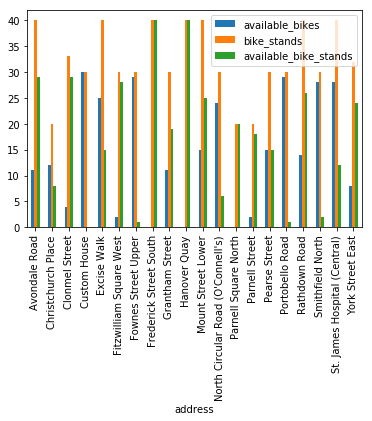

In [29]:
DublinBikeData01032019=CleanDataFrame01032019[CleanDataFrame01032019["contract_name"] == "Dublin"]
DublinBikeData01032019=DublinBikeData01032019.iloc[0:20]
DublinBikeDataClean01032019=DublinBikeData01032019[['available_bikes', 'bike_stands', 'available_bike_stands', 'address']]
BikesGroupDublin01032019=DublinBikeDataClean01032019.groupby('address')
TotalBikes01032019=BikesGroupDublin01032019.sum()

my_plot1 = TotalBikes01032019.plot(kind='bar')
TotalBikes01032019.describe()

In many places such as Fownes Street Upper, Portobello Road and Custom House, the number of available bikes is similar to the number of bike stands, implying that at this time, this stations are not in high demand. However, its not the case for every place. Clonmel Street and Avondale Street do not have many available bikes so this implies that they are stations of high demand. Frederick Street South and Hanover Quay have no available bikes at all. Therefore, this implies that these stations are either very popular at this time or they are popular places to get a bike from early in the day but not as popular of stations to leave the bike back.

### Example 1 Part 2: 11th March 2019 at 9:00am - 12:00pm - 15:00pm - 18:00pm


The next part is based on analysing how the usage of bikes changes throughout the day. This will allow us to indentify the popular stations in the city. I collected data on the 11th March 2019 at the following times: 9:00 am, 12:00 pm, 15:00 pm, 18:00 pm. Both 9:00am and 18:00 pm are in the peak rush hour time while 12:00 pm and 15:00 pm wouldnt be as busy. We would expect that the usage of bikes at 9:00am and 18:00pm would be busy compared to 12:00 pm and 15:00pm. 

###### Importing the data for 11th March 2019 at 9:00am 

In [30]:
with open('BikeData110320190900.json', 'r') as file:
    Data = json.load(file)
    
DataCollected110320190900 = json_normalize(Data)
DataFrame110320190900=pd.DataFrame(DataCollected110320190900)

Filter the information to only display information concerning Dublin and information from columns of interest with all stations of status closed removed from the data

,available_bikes,bike_stands,available_bike_stands
count,20.000000,20.000000,20.000000
mean,8.950000,32.250000,23.150000
std,12.630269,6.927254,11.913173
min,0.000000,20.000000,0.000000
25%,0.000000,30.000000,14.500000
50%,3.000000,30.000000,26.000000
75%,13.000000,40.000000,30.000000
max,40.000000,40.000000,40.000000


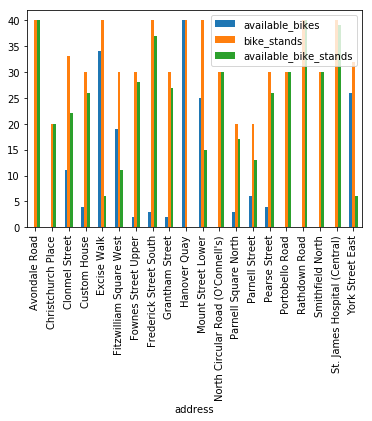

In [32]:
OperatingStationsDataFrame110320190900 = DataFrame110320190900[DataFrame110320190900["status"] == 'OPEN'] #limiting the stations to only stations that are open
CleanDataFrame110320190900=OperatingStationsDataFrame110320190900.drop(OperatingStationsDataFrame110320190900.columns[[3,5,7,8,9,10,11,12]], axis=1) #removing any columns that are not needed
DublinBikeData110320190900=CleanDataFrame110320190900[CleanDataFrame110320190900["contract_name"] == "Dublin"] #limiting the information to only concern Dublin
DublinBikeData110320190900=DublinBikeData110320190900.iloc[0:20] #limiting data to the first 20 rows
DublinBikeData110320190900=DublinBikeData110320190900[['available_bikes', 'bike_stands', 'available_bike_stands', 'address']]
BikesGroupDublin110320190900=DublinBikeData110320190900.groupby('address')
TotalBikes110320190900=BikesGroupDublin110320190900.sum()

my_plot1 = TotalBikes110320190900.plot(kind='bar')
TotalBikes110320190900.describe()


At 9:00 am on the 11th March, we can see that there were no available bikes at the following stations: Avondale Road, Christchurch Place, North Circular Road, Portobello Road, Rathdown Road, Smithfield North and St.James Hospital (Central). These stations are most popular at 09:00 am in the morning. The stations with the least demand at 09:00 am in the morning are Hanover Quay, Excise Walk and York Street East. It is useful for commuters who use the bikes to know which stations have high demand in the morning so that this doesnt affect their commute in the morning.

The average number of available bike stands was approx 23. The average number of available bikes was approx 9. If we even compare this value to Friday 1st March at 20:56 pm (Example 1 Part 1), the average number of available bikes on Friday was approximately 14. The average number of available bikes has decreased by 5 which is expected since 9am on a Monday would be a busier time than Friday evening.

###### Importing the data from 11th March 2019 at 12:00 pm 

In [33]:
with open('BikeData110320191200.json', 'r') as file:
    Data = json.load(file)
    
DataCollected110320191200 = json_normalize(Data)
DataFrame110320191200=pd.DataFrame(DataCollected110320191200)

,available_bikes,bike_stands,available_bike_stands
count,20.000000,20.000000,20.000000
mean,11.550000,32.250000,20.550000
std,12.975584,6.927254,11.940532
min,0.000000,20.000000,0.000000
25%,1.000000,30.000000,12.250000
50%,6.000000,30.000000,20.500000
75%,18.000000,40.000000,27.500000
max,40.000000,40.000000,40.000000


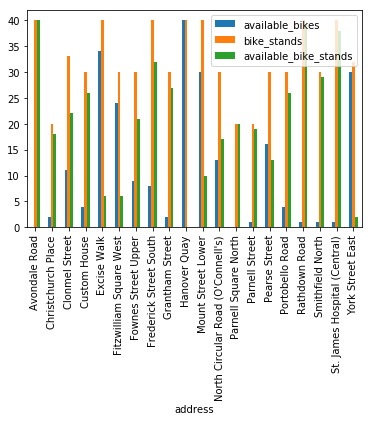

In [34]:
OperatingStationsDataFrame110320191200 = DataFrame110320191200[DataFrame110320191200["status"] == 'OPEN']
CleanDataFrame110320191200=OperatingStationsDataFrame110320191200.drop(OperatingStationsDataFrame110320191200.columns[[3,5,7,8,9,10,11,12]], axis=1)
DublinBikeData110320191200=CleanDataFrame110320191200[CleanDataFrame110320191200["contract_name"] == "Dublin"]
DublinBikeData110320191200=DublinBikeData110320191200.iloc[0:20]
DublinBikeDataClean110320191200=DublinBikeData110320191200[['available_bikes', 'bike_stands', 'available_bike_stands', 'address']]
BikesGroupDublin110320191200=DublinBikeDataClean110320191200.groupby('address')
TotalBikes110320191200=BikesGroupDublin110320191200.sum()

plot2 = TotalBikes110320191200.plot(kind='bar')
TotalBikes110320191200.describe()

After collecting the data from the 09:00 am and 12:00pm files,we can analyse the results before continuing on with the next times. For ease, we will focus our attention on how the number of available bikes changes between the two different times.

In [35]:
Addresses11032019=DublinBikeData110320190900['address']

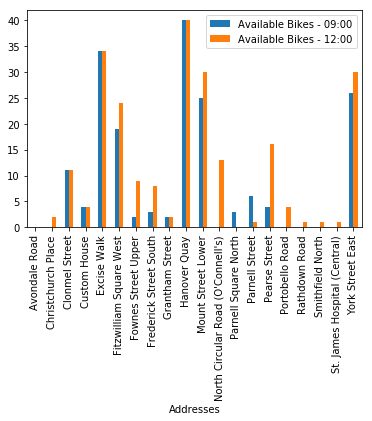

In [37]:
AvailableBikes110320190900=DublinBikeData110320190900['available_bikes']
AvailableBikes110320191200=DublinBikeDataClean110320191200['available_bikes']
Addresses11032019=DublinBikeData110320190900['address']

AvailableBikesDataFrame09001200 = pd.DataFrame(
    {'Available Bikes - 09:00': AvailableBikes110320190900,
     'Available Bikes - 12:00':AvailableBikes110320191200 ,
      'Addresses':Addresses11032019
     
    })

GroupedAvailableBikesDataFrame09001200=AvailableBikesDataFrame09001200.groupby('Addresses')
TotalGroupedAvailableBikesDataFrame09001200=GroupedAvailableBikesDataFrame09001200.sum()

plot3 = TotalGroupedAvailableBikesDataFrame09001200.plot(kind='bar')

Comparing the availability of bikes at 09:00 am and 12:00pm, we can see that in many places, the number of bikes available was greater at 12:00pm than 09:00am. This is what we would expect since at 09:00am we expect more people to be using the bikes aka the number of available bikes at the stations would be lower because people would be using them for the commute to work. Therefore, by 12:00pm the availability of bikes would have increased.
It is also interesting to look at where the availability of bikes increased the most. If we focus on the fact that people use the bikes to commute to work, then we should see the number of available bikes at 12:00pm increase greatly in places where there are a lot of offices aka grand canal, mount street lower and convention centre because this is where people would finish their commute and drop off their bike. 
For example, Mount street lower, Smithfield North and Pearse Street are places where there are a lot of offices and so, they are places of peoples work locations. At 09:00am, we would expect the availability of bikes to be lower than 12:00pm. In fact, at 09:00 am Mount Street Lower had 25 bikes available, Smithfield North had no bikes available and Pearse Street had 4 bikes available. At 12:00pm, Mount Street Lower had 30 bikes available, Smithfield North had 1 bike available and Pearse Street had 16 bikes available. These results are as we expected.

The amount of available bikes at Hanover Quay and Excise Walk do not change from 09:00 am to 12:00 om which tells us that these stations are not very popular stations.



##### Importing data from 11th March 2019 at 15:00 pm and 18:00 pm 

I import the information and filter it to contain only information concerning Dublin the same way as i did before. Thus, i will no go into detail about this procedure.

In [39]:
with open('BikeData110320191456.json', 'r') as file: #importing the data
    Data = json.load(file)
    
DataCollected110320191456 = json_normalize(Data)
DataFrame110320191456=pd.DataFrame(DataCollected110320191456)

,available_bikes,bike_stands,available_bike_stands
count,20.000000,20.000000,20.000000
mean,10.850000,32.250000,21.400000
std,13.160047,6.927254,12.483252
min,0.000000,20.000000,1.000000
25%,1.000000,30.000000,14.250000
50%,4.000000,30.000000,21.000000
75%,16.750000,40.000000,30.000000
max,39.000000,40.000000,40.000000


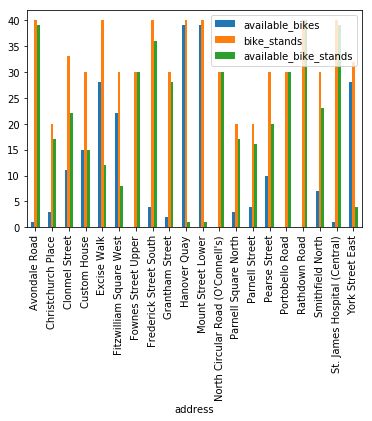

In [40]:
OperatingStationsDataFrame110320191456 = DataFrame110320191456[DataFrame110320191456["status"] == 'OPEN'] #limiting the data to only stations that are open
CleanDataFrame110320191456=OperatingStationsDataFrame110320191456.drop(OperatingStationsDataFrame110320191456.columns[[3,5,7,8,9,10,11,12]], axis=1) # removing columns that are not needed
DublinBikeData110320191456=CleanDataFrame110320191456[CleanDataFrame110320191456["contract_name"] == "Dublin"] # restricting the data to only concern Dublin
DublinBikeData110320191456=DublinBikeData110320191456.iloc[0:20] # displaying on the first 20 rows
DublinBikeDataClean110320191456=DublinBikeData110320191456[['available_bikes', 'bike_stands', 'available_bike_stands', 'address']]
BikesGroupDublin110320191456=DublinBikeDataClean110320191456.groupby('address')
TotalBikes110320191456=BikesGroupDublin110320191456.sum()

plot2 = TotalBikes110320191456.plot(kind='bar')
TotalBikes110320191456.describe()

In [41]:
with open('BikeData110320191800.json', 'r') as file:
    Data = json.load(file)
    
DataCollected110320191800 = json_normalize(Data)
DataFrame110320191800=pd.DataFrame(DataCollected110320191800)

In [44]:
OperatingStationsDataFrame110320191800 = DataFrame110320191800[DataFrame110320191800["status"] == 'OPEN']
CleanDataFrame110320191800=OperatingStationsDataFrame110320191800.drop(OperatingStationsDataFrame110320191800.columns[[3,5,7,8,9,10,11,12]], axis=1)
DublinBikeData110320191800=CleanDataFrame110320191800[CleanDataFrame110320191800["contract_name"] == "Dublin"]
DublinBikeData110320191800=DublinBikeData110320191800.iloc[0:20]
DublinBikeDataClean110320191800=DublinBikeData110320191800[['available_bikes', 'bike_stands', 'available_bike_stands', 'address']]
BikesGroupDublin110320191800=DublinBikeDataClean110320191800.groupby('address')
TotalBikes110320191800=BikesGroupDublin110320191800.sum()
TotalBikes110320191800.describe()

,available_bikes,bike_stands,available_bike_stands
count,20.000000,20.000000,20.000000
mean,9.700000,32.250000,22.500000
std,11.420665,6.927254,14.670055
min,0.000000,20.000000,0.000000
25%,0.750000,30.000000,11.500000
50%,3.000000,30.000000,22.000000
75%,18.250000,40.000000,38.250000
max,30.000000,40.000000,40.000000


Next, i am going to produce the same graph as above but include the four times - 09:00am, 12:00pm, 15:00pm and 18:00pm - and analyse how the data changes.

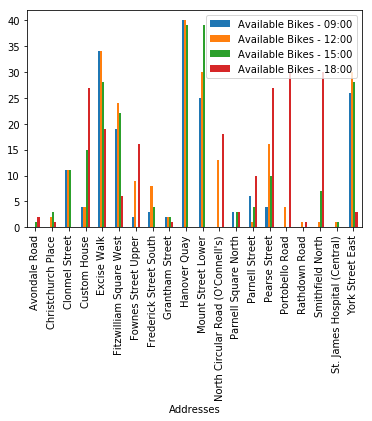

In [43]:
# gathering the information for each time to put in a dataframe
AvailableBikes110320190900=DublinBikeData110320190900['available_bikes']
AvailableBikes110320191200=DublinBikeDataClean110320191200['available_bikes']
AvailableBikes110320191456=DublinBikeData110320191456['available_bikes']
AvailableBikes110320191800=DublinBikeDataClean110320191800['available_bikes']
Addresses11032019=DublinBikeData110320190900['address']

#creating a dataframe containing the information for the four times 
AvailableBikesDataFrame09001200 = pd.DataFrame(
    {'Available Bikes - 09:00': AvailableBikes110320190900,
     'Available Bikes - 12:00':AvailableBikes110320191200 ,
     'Available Bikes - 15:00':AvailableBikes110320191456,
     'Available Bikes - 18:00':AvailableBikes110320191800,
      'Addresses':Addresses11032019
     
    })

GroupedAvailableBikesDataFrame09001200=AvailableBikesDataFrame09001200.groupby('Addresses') # grouping the information by the address of the station
TotalGroupedAvailableBikesDataFrame09001200=GroupedAvailableBikesDataFrame09001200.sum()

plot3 = TotalGroupedAvailableBikesDataFrame09001200.plot(kind='bar')

The key information that we can take from the graph above is: 

The least activity stations are Clomnel Street, Grantham Street and Hanover Quay since the available of bikes doesnt deviate much at the different times.


In general, 09:00 am is when the number of bikes available is the lowest.

Overall, 12:00pm is the least activity time for the bikes. It is when, on average, the number of available bikes is greatest.

## Including a second API - Weather

The single API that was chosen for this assignment was provided by www.openweathermap.com
The information on the API was specifically obtained from: https://api.openweathermap.org

The API key that works here is: 3959e0b7ba3dcf2d9f244a4ed96f0a69

### Example 1 Part 3: Comparing bike usage in Gothenburg vs Seville

I have decided to include a second API to provide information on the weather in particular cities at certain times. With this information, i can analyse how the usage of the bikes changes depending on the weather.

As seen before with the first API, the first thing is to extract data using requests.get which allows you to send a HTTP request. Printing out the response, it returns the number 200 informing us that the request succeeded and that the resource is returned.
I have included the coordinates of the city of choice as well as the preferred choice of units of temperature which is degrees celsius. 

In [45]:
parameters = {'lat':53.35, 'lon':-6.25 }  #Coordinates for Dublin 
api_key = '3959e0b7ba3dcf2d9f244a4ed96f0a69'
weatherresponse = requests.get('https://api.openweathermap.org/data/2.5/forecast?&units=metric&appid='+api_key, params=parameters);
print(weatherresponse.status_code)

200


Next, we parse ..... This converts a given string into a dictionary which allows you to access your JSON data easily within your code.

In [46]:
WeatherCollected = json.loads(weatherresponse.text)

Next, we save the information to file to be able to access it whenever we want.

In [47]:
filename = 'hi.json'
write_to_file(filename, WeatherCollected)

In order to gather data that is already in a file, we compile the following code:

In [48]:
with open('WeatherInformationSeville13032019to18032019.json', 'r') as file:
    DataSeville = json.load(file)
    #print(Data)


Looking at the information quickly, we can see that we have a nested json file. Before we begin analysing the information, we have to firsly use the nested file to create a flattened panda dataframe. i then flatten the next array.
In order to be able to view all the information in one dataframe, i add the columns of the nested array on to the original dataframe

In [49]:
DataSeville13032019to18032019=DataSeville['list']
DataSeville13032019to18032019 = json_normalize(DataSeville13032019to18032019)
DataSeville13032019to18032019=pd.DataFrame(DataSeville13032019to18032019)

#----Dealing with the nested array-----------------------------------------
WeatherDataSeville13032019to18032019=json_normalize(data=DataSeville['list'], record_path='weather')

#----Defining the columns of weather to add it to the main dataframe-------
WeatherDataDescriptionSeville13032019to18032019=WeatherDataSeville13032019to18032019.description
WeatherDataIconSeville13032019to18032019=WeatherDataSeville13032019to18032019.icon
WeatherDataMainSeville13032019to18032019=WeatherDataSeville13032019to18032019.main
WeatherDataIdSeville13032019to18032019=WeatherDataSeville13032019to18032019.id

DataSeville13032019to18032019['Weather Description']=WeatherDataDescriptionSeville13032019to18032019
DataSeville13032019to18032019['Weather Main']=WeatherDataMainSeville13032019to18032019
DataSeville13032019to18032019['Icon']=WeatherDataIconSeville13032019to18032019
DataSeville13032019to18032019
DataSeville13032019to18032019['Id']=WeatherDataIdSeville13032019to18032019

It is important to mention now, the meaning of the parameters as well as the units of all the parameters: 

    main.grnd_level = Atmospheric pressure on the ground evel measured in hPa
    main.humidity = Humidity measured in %
    main.pressure = Atmospheric pressure on the sea level measured in hPa
    main.sea_level = Atmospheric pressure on the sea level, measured in hPa
    main.temp = Temperature, measured in celsius
    main.temp_kf = internal parameter
    main.temp_max = maximum temperature at the moment of calculation, measured in celsius
    main.temp_min = minimum temperature at the moment of calculation, measured in celsius
    rain.3h = rain volume for last 3 hours, measured in mm 
    wind.deg = wind direction measured in degrees
    wind.speed = wind speed, measured in meter/sec
    clouds.all = cloudiness measured in %
    
In order to simplify the data, i have dropped some of the unneccessary columns such as 'sys.pod','Id'. I have also dropped 'weather' since its information is now contained in separate columns. I am also going to drop 'dt' except dt_txt to keep note of the date and time of the information.
It is important to note that one of the columns of the array 'weather' is called icon. It refers to the icon that describes the weather. In order to see what the number in the icon column represents, you can use the following url, remembering to include the icon number - http://openweathermap.org/img/w/10d.png. However, the icon number does not have much meaning for the data analyse done here so i will also drop this column. 
I am also going to drop the columns that are related to the sea level and pressure as i only want to focus on the type of weather and the temperature etc.

In [50]:
DataSeville13032019to18032019=DataSeville13032019to18032019.drop(DataSeville13032019to18032019.columns[[1,3,5,6,8,12,13,18,19]], axis=1)

#### Importing weather information for Gothenburg

We follow the same procedure as above to import the weather for Gothenburg.

In [51]:
with open('WeatherInformationGothenburg13032019to18032019.json', 'r') as file:
    DataGothenburg = json.load(file)
    #print(Data)

In [52]:
DataGothenburg13032019to18032019=DataGothenburg['list']
DataGothenburg13032019to18032019 = json_normalize(DataGothenburg13032019to18032019)
DataGothenburg13032019to18032019=pd.DataFrame(DataGothenburg13032019to18032019)

#----Dealing with the nested array-----------------------------------------
WeatherDataGothenburg13032019to18032019=json_normalize(data=DataGothenburg['list'], record_path='weather')

#----Defining the columns of weather to add it to the main dataframe-------
WeatherDataDescriptionGothenburg13032019to18032019=WeatherDataGothenburg13032019to18032019.description
WeatherDataIconGothenburg13032019to18032019=WeatherDataGothenburg13032019to18032019.icon
WeatherDataMainGothenburg13032019to18032019=WeatherDataGothenburg13032019to18032019.main
WeatherDataIdGothenburg13032019to18032019=WeatherDataGothenburg13032019to18032019.id

DataGothenburg13032019to18032019['Weather Description']=WeatherDataDescriptionGothenburg13032019to18032019
DataGothenburg13032019to18032019['Weather Main']=WeatherDataMainGothenburg13032019to18032019
DataGothenburg13032019to18032019['Icon']=WeatherDataIconGothenburg13032019to18032019
DataGothenburg13032019to18032019
DataGothenburg13032019to18032019['Id']=WeatherDataIdGothenburg13032019to18032019

As we can see from the printed table for the weather information of both cities, it contains information for multiple days and multiple hours. However, the bike data information that we are going to import is for one time on one day only - 14th March at 15:00 pm. Thus, i am going to filter the weather data for both cities to the 14th March at 15:00pm. I could filter this information out by looking at the table and see what index it is associated with. However, it is more efficient to search for the row in a column that contains the relevant date and time.


In [53]:
WeatherDataSeville140320191500= DataSeville13032019to18032019[DataSeville13032019to18032019["dt_txt"]=='2019-03-14 15:00:00']
WeatherDataGothenburg140320191500= DataGothenburg13032019to18032019[DataGothenburg13032019to18032019["dt_txt"]=='2019-03-14 15:00:00']

In [54]:
WeatherDataSeville140320191500

,clouds.all,dt_txt,main.humidity,main.temp,main.temp_max,main.temp_min,rain.3h,wind.deg,wind.speed,Weather Description,Weather Main
8,0,2019-03-14 15:00:00,47,21.61,21.61,21.61,NaN,44.0075,4.46,clear sky,Clear


##### Importing bike information for Seville and Gothenburg - 14th March 2019 at 15:00 pm 

Having filtered the weather information concerning Seville, we can import the bike information for the same particular day and analyse the usage. In this case, we are going to look at 14th March 2019 at 15:00 pm. 

##### Filtering to focus on information concerning Seville

In [55]:
with open('BikeData140320191500.json', 'r') as file:
    Data = json.load(file)
    
DataCollected140320191500 = json_normalize(Data)
DataFrame140320191500=pd.DataFrame(DataCollected140320191500)


In [56]:
OperatingStationsDataFrame140320191500 = DataFrame140320191500[DataFrame140320191500["status"] == 'OPEN']
CleanDataFrame140320191500=OperatingStationsDataFrame140320191500.drop(OperatingStationsDataFrame140320191500.columns[[3,5,7,8,9,10,11,12]], axis=1)
SevilleBikeData140320191500=CleanDataFrame140320191500[CleanDataFrame140320191500["contract_name"] == "Seville"]
SevilleBikeData140320191500=SevilleBikeData140320191500.iloc[0:50]
SevilleBikeData140320191500= SevilleBikeData140320191500[SevilleBikeData140320191500["bike_stands"] == 20]

##### Filtering to focus on information concerning Gothenburg

In [57]:
GothenburgBikeData140320191500=CleanDataFrame140320191500[CleanDataFrame140320191500["contract_name"] == "Goteborg"]
GothenburgBikeData140320191500=GothenburgBikeData140320191500.iloc[0:50]
GothenburgBikeData140320191500= GothenburgBikeData140320191500[GothenburgBikeData140320191500["bike_stands"] == 20]

In order to analyse the information and the usage of the bikes fairly, i filtered the information to only focus on the stations in Seville and Gothenburg that have 20 bike stands. Thus when comparing how many available bikes there are at the stations, the maximum number of bike stands at the stations is the same for both cities.

Firstly, we can compare the statistical data. 

In [58]:
DescriptionSevilleBikeData140320191500=SevilleBikeData140320191500.describe()
DescriptionSevilleBikeData140320191500

,available_bike_stands,available_bikes,bike_stands
count,22.000000,22.000000,22.0
mean,9.090909,10.636364,20.0
std,3.753209,3.773914,0.0
min,3.000000,3.000000,20.0
25%,6.000000,8.000000,20.0
50%,9.000000,10.500000,20.0
75%,11.750000,14.000000,20.0
max,17.000000,16.000000,20.0


In [59]:
DescriptionGothenburgBikeData140320191500=GothenburgBikeData140320191500.describe()
DescriptionGothenburgBikeData140320191500

,available_bike_stands,available_bikes,bike_stands
count,20.00000,20.000000,20.0
mean,9.75000,10.200000,20.0
std,6.19741,6.118135,0.0
min,0.00000,0.000000,20.0
25%,5.75000,5.500000,20.0
50%,9.50000,10.500000,20.0
75%,14.50000,14.250000,20.0
max,20.00000,20.000000,20.0


Text(0, 0.5, 'Values of Temp and Average Available Bikes')

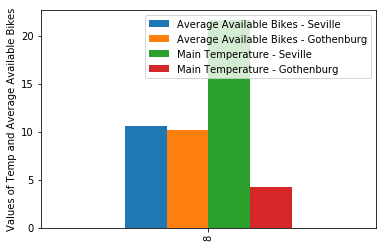

In [60]:
MeanSevilleBikeData140320191500=DescriptionSevilleBikeData140320191500.loc['mean']
MeanSevilleBikeData140320191500
MeanGothenburgBikeData140320191500=DescriptionGothenburgBikeData140320191500.loc['mean']
MeanGothenburgBikeData140320191500
AvailableBikesMeanSevilleBikeData140320191500=MeanSevilleBikeData140320191500['available_bikes']
AvailableBikesMeanGothenburgBikeData140320191500=MeanGothenburgBikeData140320191500['available_bikes']
MainTempWeatherDataSeville140320191500= WeatherDataSeville140320191500['main.temp']
MainTempWeatherDataGothenburg140320191500= WeatherDataGothenburg140320191500['main.temp']


AvailableBikesDataFrame09001200 = pd.DataFrame(
    {'Average Available Bikes - Seville': AvailableBikesMeanSevilleBikeData140320191500,
     'Average Available Bikes - Gothenburg': AvailableBikesMeanGothenburgBikeData140320191500,
     'Main Temperature - Seville':MainTempWeatherDataSeville140320191500,
     'Main Temperature - Gothenburg':MainTempWeatherDataGothenburg140320191500
      
     
    })


plot3 = AvailableBikesDataFrame09001200.plot(kind='bar')
plt.ylabel('Values of Temp and Average Available Bikes', fontsize=10)

Interestingly, the statistical data for the two cities is similar. The average number of available bike stands is approx 9 for Seville and approx 9.75 for Gothenburg. The average number of available bikes is approx 10.6 for Seville and 10.2 for Gothenburg. Both the standard deviations for each column of each city is low, Seville being approx 4 and Gothenburg being approx 6, meaning the data doesnt deviate much from the average.

The weather in Seville and Gothenburg are considerably different at this time and date. Seville saw temperatures as high as 21 degrees celsius while Gothenburg saw lower temperatures of around 4 degrees celsius. Also, Gothenburg experienced light rain compared to Seville which had clear skies. 

Therefore, we would have expected the average availability of bikes in Gothenburg to be higher considering there was rain and low temperatures so people would be less willing to cycle around. We would also have expected the opposite in Seville. Considering it experienced high temperatures and clear skies, you would expect more people to be eager to use the bikes and therefore, the average availability of bikes to be lower. However, this is not the case from the analyses done. The statistical information for both of the cities was very similar as discussed.

### Example 1 Part 4: Analysing the usage of bikes in Dublin with different weather conditions

We are going to compare the usage of bikes on the 10th March 2019 at around 15:00 pm, on the 14th March 2019 at approx 15:00pm and on the 15th March 2019 at around the same time. Analysing the data, we would expect to see the usage of bikes decrease when the weather is bad and as a result, more bikes would be available at the stations.

Firstly, ive loaded in the weather data and bike data gathered for each of the days mentioned. I clean it and present it as a informative dataframe.

##### Importing weather information for 10th March 2019 at approx 15:00 pm 

In [61]:
with open('WeatherInformationDublin10032019to15032019.json', 'r') as file:
    Data = json.load(file)

In [63]:
DataCollectedd140320191500 = json_normalize(Data)
DataFrameDublin140320191500=pd.DataFrame(DataCollectedd140320191500)
MainDataFrameDublin140320191500=Data['main']
MainDataFrameDublin140320191500=json_normalize(MainDataFrameDublin140320191500)
WeatherDataFrameDublin140320191500=Data['weather']
WeatherDataFrameDublin140320191500=json_normalize(WeatherDataFrameDublin140320191500)
RainDataFrameDublin140320191500=Data['rain']
RainDataFrameDublin140320191500=json_normalize(RainDataFrameDublin140320191500)
#combining the information together
DublinWeather100320191500 =pd.concat([RainDataFrameDublin140320191500,MainDataFrameDublin140320191500, WeatherDataFrameDublin140320191500], axis=1)
DublinWeather100320191500=DublinWeather100320191500.drop(DublinWeather100320191500.columns[[2,7,8]],axis=1)

# changing the names of columns so that it is easier to combine all the information later
DublinWeather100320191500['dt_txt'] = '2019-03-10 15:00:00'
DublinWeather100320191500['main.humidity']=DublinWeather100320191500['humidity']
DublinWeather100320191500['main.temp']=DublinWeather100320191500['temp']
DublinWeather100320191500['main.temp_max']=DublinWeather100320191500['temp_max']
DublinWeather100320191500['main.temp_min']=DublinWeather100320191500['temp_min']
DublinWeather100320191500['rain.3h']=DublinWeather100320191500['1h']

# limiting the columns that are shown
DublinWeather100320191500 = DublinWeather100320191500[['dt_txt','main.humidity','main.temp','main.temp_max','main.temp_min','rain.3h','description','main']]
DublinWeather100320191500

,dt_txt,main.humidity,main.temp,main.temp_max,main.temp_min,rain.3h,description,main
0,2019-03-10 15:00:00,86,276.58,277.04,276.15,0.64,shower rain,Rain


##### Importing weather information for 15th March 2019 at approx 15:00 pm

In [64]:
with open('WeatherInformationDublin13032019to18032019.json', 'r') as file:
    Data = json.load(file)   
DataCollected150320191500 = json_normalize(Data)
DataFrame150320191500=pd.DataFrame(DataCollected150320191500)

DataFrame150320191500=Data['list']
DataFrame150320191500= json_normalize(DataFrame150320191500)
DataFrame150320191500=pd.DataFrame(DataFrame150320191500)

#----Dealing with the nested array-----------------------------------------
WeatherData150320191500=json_normalize(data=Data['list'], record_path='weather')

#----Defining the columns of weather to add it to the main dataframe-------
WeatherDataDescription150320191500=WeatherData150320191500.description
WeatherDataIcon150320191500=WeatherData150320191500.icon
WeatherDataMain150320191500=WeatherData150320191500.main
WeatherDataId150320191500=WeatherData150320191500.id


DataFrame150320191500['description']=WeatherDataDescription150320191500
DataFrame150320191500['main']=WeatherDataMain150320191500

DataFrame150320191500['Icon']=WeatherDataIcon150320191500

DataFrame150320191500['Id']=WeatherDataId150320191500
#adding a date and time column
DublinWeather150320191500=DataFrame150320191500[DataFrame150320191500["dt_txt"] == "2019-03-15 15:00:00"]
DublinWeather150320191500
DublinWeather150320191500=DublinWeather150320191500.drop(DublinWeather150320191500.columns[[0,1,3,5,6,8,12,13,14,15,18,19]], axis=1)
DublinWeather150320191500

,dt_txt,main.humidity,main.temp,main.temp_max,main.temp_min,rain.3h,description,main
16,2019-03-15 15:00:00,87,10.0,10.0,10.0,NaN,broken clouds,Clouds


##### Importing weather information for 14th March 2019 at 15:00 pm

In [65]:
with open('WeatherInformationDublin13032019to18032019.json', 'r') as file:
    Data = json.load(file)   
DataCollected140320191500 = json_normalize(Data)
DataFrame140320191500=pd.DataFrame(DataCollected140320191500)

DataFrame140320191500=Data['list']
DataFrame140320191500= json_normalize(DataFrame140320191500)
DataFrame140320191500=pd.DataFrame(DataFrame140320191500)

#----Dealing with the nested array-----------------------------------------
WeatherData140320191500=json_normalize(data=Data['list'], record_path='weather')

#----Defining the columns of weather to add it to the main dataframe-------
WeatherDataDescription140320191500=WeatherData140320191500.description
WeatherDataIcon140320191500=WeatherData140320191500.icon
WeatherDataMain140320191500=WeatherData140320191500.main
WeatherDataId140320191500=WeatherData140320191500.id

DataFrame140320191500['description']=WeatherDataDescription140320191500
DataFrame140320191500['main']=WeatherDataMain140320191500
DataFrame140320191500['Icon']=WeatherDataIcon140320191500

DataFrame140320191500['Id']=WeatherDataId140320191500

DublinWeather140320191500=DataFrame140320191500[DataFrame140320191500["dt_txt"] == "2019-03-14 15:00:00"]
DublinWeather140320191500
DublinWeather140320191500=DublinWeather140320191500.drop(DublinWeather140320191500.columns[[0,1,3,5,6,8,12,13,14,15,18,19]], axis=1)
DublinWeather140320191500

,dt_txt,main.humidity,main.temp,main.temp_max,main.temp_min,rain.3h,description,main
8,2019-03-14 15:00:00,88,9.78,9.78,9.78,NaN,few clouds,Clouds


##### Importing bike information for 10th March 2019 at approx 15:30 pm

In [66]:
with open('BikeData100320191500.json', 'r') as file:
    Data = json.load(file)
    
DataCollected100320191500 = json_normalize(Data)
DataFrame100320191500=pd.DataFrame(DataCollected100320191500)
DataFrame100320191500=DataFrame100320191500[DataFrame100320191500["contract_name"] == "Dublin"]

##### Importing bike information for 15th March 2019 at approx 15:00 pm

In [67]:
with open('BikeData150320191500.json', 'r') as file:
    Data = json.load(file)
    
DataCollected150320191500 = json_normalize(Data)
DataFrame150320191500=pd.DataFrame(DataCollected150320191500)
DataFrame150320191500=DataFrame150320191500[DataFrame150320191500["contract_name"] == "Dublin"]

##### Importing bike information for 14th March 2019 at 15:00 pm

In [68]:
with open('BikeData140320191500.json', 'r') as file:
    Data = json.load(file)
    
DataCollected140320191500 = json_normalize(Data)
DataFrame140320191500=pd.DataFrame(DataCollected140320191500)
DataFrame140320191500=DataFrame140320191500[DataFrame140320191500["contract_name"] == "Dublin"]

In [69]:
DescribeDataFrame100320191500=DataFrame100320191500.describe()

In [70]:
DescribeDataFrame150320191500=DataFrame150320191500.describe()

In [71]:
DescribeDataFrame140320191500=DataFrame140320191500.describe()

In [72]:
# creating a dataframe to contain all the information - weather and average available bikes
AvailableBikesDescribeDataFrame100320191500=DescribeDataFrame100320191500.loc['mean','available_bikes']
AvailableBikesDescribeDataFrame140320191500=DescribeDataFrame140320191500.loc['mean','available_bikes']
AvailableBikesDescribeDataFrame150320191500=DescribeDataFrame150320191500.loc['mean','available_bikes']
DublinWeather100320191500['Average available bikes'] = AvailableBikesDescribeDataFrame100320191500
DublinWeather140320191500['Average available bikes'] = AvailableBikesDescribeDataFrame140320191500
DublinWeather150320191500['Average available bikes'] = AvailableBikesDescribeDataFrame150320191500

# Pass the row elements as key value pairs to append() function 
PartDataFrame = DublinWeather100320191500.append( DublinWeather140320191500, ignore_index=True)
FullDataFrame=PartDataFrame.append(DublinWeather150320191500, ignore_index=True)

CompleteFullDataFrame =FullDataFrame.fillna(0)
CompleteFullDataFrame

,dt_txt,main.humidity,main.temp,main.temp_max,main.temp_min,rain.3h,description,main,Average available bikes
0,2019-03-10 15:00:00,86,276.58,277.04,276.15,0.64,shower rain,Rain,11.008850
1,2019-03-14 15:00:00,88,9.78,9.78,9.78,0.00,few clouds,Clouds,10.522124
2,2019-03-15 15:00:00,87,10.00,10.00,10.00,0.00,broken clouds,Clouds,10.495575


We can see from the dataframe that the results are as expected. The average available bikes at the station is greater when the weather is worse. On the 10th March 2019, it was raining and so the average availability of bikes was approx 11 while the average availabilty of bikes on the 14th March and 15th March was less, at approximately 10.5. Less people are willing to cycle when the weather is bad.

In [73]:
CorrDataFrame = CompleteFullDataFrame[['rain.3h', 'Average available bikes']]

CorrDataFrame.corr()

,rain.3h,Average available bikes
rain.3h,1.000000,0.998944
Average available bikes,0.998944,1.000000


Although we only have 3 values for each variable, we can look at the correlation between rain and average availbility of bikes. Above we can see that the correlation is extremely high at 0.9989 informing us that as the rain increases so does the average availabilty of bikes. However, as mentioned before, the amount of samples used for this correlation are very small so the value is not as accurate as it should be.

### Conclusion 

To conclude, we can see that the bike scheme is popular in many cities. In Dublin, the bike scheme is especially popular as a commuting tool. We also saw that bad weather has an impact of the usage of the bikes in Dublin. During bad weather, the average availability of bikes decreases compared to dry weather. However, cold weather doesnt affect the usage of the bikes as we saw when we compared Seville and Gothenburg.